<a href="https://colab.research.google.com/github/arindalestari/Supervised-Learning/blob/main/Supervised_Learning_Studi_Kasus_Penyakit_Jantung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Arinda Cinta Lestari

Nim  : 4112319007

Prodi: Statistika Terapan dan Komputasi




> **Permodelan Klasifikasi Menggunakan Supervised Learning**

# Masalah

> Memprediksi penderita yang terkena gagal jantung apakah disebabkan mempunyai riwayat serangan jantung sebelumnya atau tidak.

# Sumber Data
> Data ini diperoleh dari Kaggle dengan link berikut.
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

> Deskripsi data

Penyakit kardiovaskular (CVDs) adalah penyebab nomor 1 kematian secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia. Empat dari 5 CVD kematian disebabkan oleh serangan jantung dan stroke, dan sepertiga dari kematian ini terjadi sebelum waktunya pada orang di bawah usia 70 tahun. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 11 fitur yang dapat digunakan untuk memprediksi kemungkinan penyakit jantung.

In [ ]:
# import library pandas, Matplotlib dan NumPy untuk analisis dan manipulasi data.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# visualisasi Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Library untuk melatih model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

> Penjelasan fungsi

Matplotlib dan Seaborn digunakan untuk visualisasi. Dengan library tersebut, dapat membuat chart, grafik, histogram, dll dengan sangat mudah dan tanpa memerlukan banyak code. Meskipun keduanya sama-sama digunakan untuk visualisasi, namun Matplotlib hanya dapat digunakan untuk visualisasi dasar, sedangkan untuk menghasilkan visualisasi yang lebih menarik dapat menggunakan Seaborn.

Scikit-learn atau Sklearn adalah library berbasis Python untuk membangun model pembelajaran mesin yang menyediakan banyak algoritma pembelajaran untuk regresi, pengelompokan, dan klasifikasi.

> untuk import dataset gunakan perintah berikut:

from google.colab import files

uploaded = files.upload()

```
# Ini diformat sebagai kode
```



# **Eksplorasi analisis data (EDA)**



EDA ini digunakan untuk mengetahui seputar data seperti jenis data, mengecek data yang hilang, menambahkan, mengubah, atau menghapus fitur untuk memaksimalkan data dan melihat outlier.



In [ ]:
from google.colab import files

uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
# Memuat data atau membaca data
df = pd.read_csv("heart.csv")
df.shape # (rows, columns)

(918, 12)

Dalam dataset heart.csv tersebut, terdapat 12 kolom dan 918 baris.

In [ ]:
# Melihat data 5 baris dari atas
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


> **Informasi variabel**


1.   Age : usia pasien (tahun)
2.   Sex : Jenis Kelamin (M: laki-laki, F: perempuan)
3.   ChestPainType : Tipe Nyeri Dada (TA: Typical Angina, ATA: Atypical Angina, NAP: Nyeri Non-Anginal, ASY: Asymptomatic/tanpa gejala)
4.   RestingBP : Tekanan darah (mmHg)
5.   Cholesterol : Kolesterol (mm/dl)
6.   FastingBS : gula darah saat puasa (1: jika Puasa BS > 120 mg/dl, 0: sebaliknya)
7.   RestingECG : hasil elektrokardiogram (Normal: Normal, ST: memiliki kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV), LVH: menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri menurut kriteria Estes)
8.   MaxHR : detak jantung maksimum (antara 60 dan 202)
9.   ExerciseAngina : Gejala angin duduk (Y: Ada, N: Tidak)
10.  Oldpeak : oldpeak = depresi ST yg diakibatkan olehlatihan relative terhadap saat istirahat
11.  ST_Slope : Tingkat kemiringan gelombang ST (Up: upsloping/naik, Flat: flat/datar, Down: downsloping/menurun)
12.  HeartDisease : Penyakit jantung (1: memiliki penyakit jantung, 0: tidak ada)


In [ ]:
# Melihat data 5 baris dari bawah pada data frame
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


# Melihat Missing Value


isna() digunakan untuk mengecek apakah ada nilai NaN pada dataframe. Function ini akan mengembalikan nilai Boolean, True atau False, untuk tiap elemen di dataframe.

In [ ]:
# Mengecek missing value
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Hasil Output tersebut menunjukan bahwa tidak ada nilai na atau missing value pada data heart.csv

In [ ]:
# Menampilkan informasi dataframe secara detail
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Terdapat 1 tipe data float64, 6 tipe data integer, dan 5 tipe data obyek.

In [ ]:
# Melihat Ringkasan Data dan hanya bertipe integer yang bisa dibaca
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


> Rata-rata umur kebanyakan adalah usia 53 tahun, paling rentan yang terkena gagal jantung di usia minimal 28 tahun dan maksimal 77 tahun 75% diantaranya umur 60 tahun. Rata-rata tekanan darah penderita gagal jantung adalah 132 mmHg dengan tekanan datah minimum 0 mmHg dan maksimum 200 mmHg, 75% tekanan darah 140 mmHg. Tingkat kolesterol penderita gagal jantung rata-rata 132 mm/dl dengan standar deviasi 109 mm/dl, tingkat kolesterol penderita gagal jantung dengan minimum 0 mm/dl dan maksimum 603 mm/dl. Kadar gula darah penderita gagal jantung pada saat puasa rata-rata sebesar 0.23 jika Puasa Bisa > 120 mg/dl. Detak jantung maksimum antara 60 dan 102 sedangkan pada variabel MaxHR detak jantung maksimumnya diperoleh 202. Pada penderita yang terkena gagal jantung rata-rata ada penyakit jantung bawaan yaitu 0.55 pasien.

# Visualisasi


Untuk data string, misalkan data tersebut adalah kategori, fungsi value_counts() untuk mengetahui jumlah tiap kategori pada data. Untuk variabel 'Sex' sendiri bertipe data string dengan kategori maka dapat menggunakan sintaks berikut.

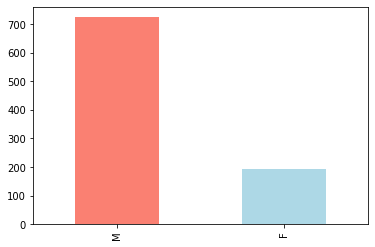

In [ ]:
df["Sex"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

Pada diagram batang tersebut menunjukan jenis kelamin laki-laki adalah penderita gagal jantung, dibandingkan dengan jenis kelamin wanita

In [ ]:
# Menghitung Nilai Variabel HeartDisease
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
# Membandingkan kolom jenis kelamin dan yang terkena serangan jantung
pd.crosstab(df.HeartDisease, df.Sex)

Sex,F,M
HeartDisease,,
0,143,267
1,50,458


> jenis kelamin laki-laki yang terkena penyakit jantung sebanyak 458 orang dan yang tidak terkena penyakit jantung sebanyak 267 orang, sedangkan untuk wanita sebanyak 143 orang yang tidak terkena penyakit jantung dan sebanyak 50 orang terkena penyakit jantung.

> Berikut adalah visualisasi frekuensi penyakit jantung berdasarkan jenis kelamin dengan sintaks berikut.

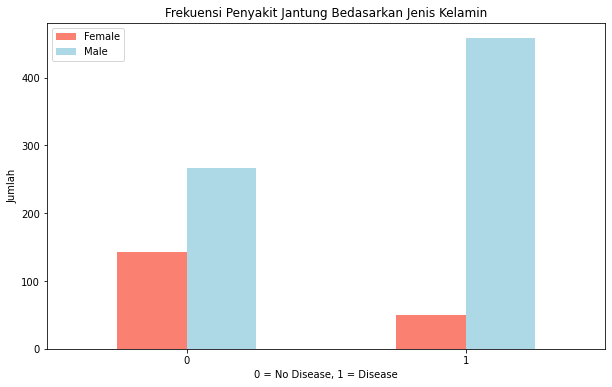

In [ ]:
# Membuat crosstab
pd.crosstab(df.HeartDisease, df.Sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])
plt.title("Frekuensi Penyakit Jantung Bedasarkan Jenis Kelamin")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Jumlah")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

# Korelasi Matriks

> Mengapa diperlukan membuat korelasi matriks ? karena matriks ini nantinya digunakan untuk mendapatkan nilai kedekatan hubungan antar variabel penelitian.

Sebelum membuat matriks korelasi,dilakukan preprocesing data untuk memastikan kualitas data yang baik dengan sintaks berikut.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

> Selanjutnya, untuk memastikan apakah data label sudah berubah menjadi data numerik menggunakan sintaks berikut.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             918 non-null    int64
 1   Sex             918 non-null    int64
 2   ChestPainType   918 non-null    int64
 3   RestingBP       918 non-null    int64
 4   Cholesterol     918 non-null    int64
 5   FastingBS       918 non-null    int64
 6   RestingECG      918 non-null    int64
 7   MaxHR           918 non-null    int64
 8   ExerciseAngina  918 non-null    int64
 9   Oldpeak         918 non-null    int64
 10  ST_Slope        918 non-null    int64
 11  HeartDisease    918 non-null    int64
dtypes: int64(12)
memory usage: 86.2 KB


In [ ]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.274459,-0.042942,0.198039,-0.007484,-0.383374,0.215793,0.266295,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.018717,-0.190713,0.120076,0.071552,-0.189878,0.190664,0.116254,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.011818,0.013115,-0.073151,-0.072537,0.291560,-0.354727,-0.180408,0.213521,-0.386828
RestingBP,0.274459,0.018717,-0.011818,1.000000,0.113785,0.064806,0.026082,-0.109674,0.158825,0.174026,-0.074377,0.113658
Cholesterol,-0.042942,-0.190713,0.013115,0.113785,1.000000,-0.188082,-0.177116,0.175997,0.016763,0.058568,0.063680,-0.138663
FastingBS,0.198039,0.120076,-0.073151,0.064806,-0.188082,1.000000,0.087050,-0.131018,0.060451,0.069180,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.026082,-0.177116,0.087050,1.000000,-0.179168,0.077500,-0.015096,-0.006778,0.057384
MaxHR,-0.383374,-0.189878,0.291560,-0.109674,0.175997,-0.131018,-0.179168,1.000000,-0.376149,-0.176992,0.346587,-0.402627
ExerciseAngina,0.215793,0.190664,-0.354727,0.158825,0.016763,0.060451,0.077500,-0.376149,1.000000,0.422670,-0.428706,0.494282
Oldpeak,0.266295,0.116254,-0.180408,0.174026,0.058568,0.069180,-0.015096,-0.176992,0.422670,1.000000,-0.513817,0.420282


(12.0, 0.0)

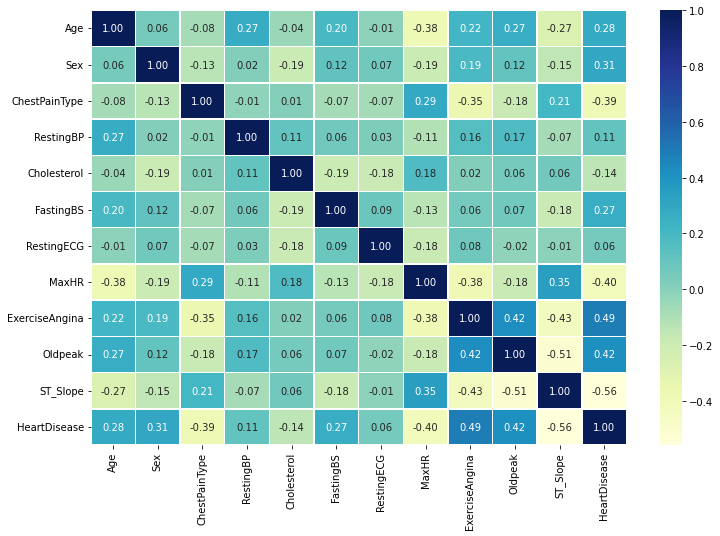

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()

Korelasi positif terjadi apabila variabel dependen dan variabel independen berjalan dengan paralel atau searah, dan sebaliknya jika korelasinya negatif maka arah hubungannya berlawanan. korelasi positif ditampilkan dengan warna navy, sedangkan korelasi negatif berwarna cream. semakin pudar warna maka korelasinya semakin kecil. Contoh variabel HeartDisease terhadap ST_Slope hubungan antar variabelnya semakin rendah yaitu sebesar -0.56 dibandingkan dengan variabel HeartDisease dengan ExerciseAngina korelasinya positif yaitu sebesar 0.49. Jika visualisasi dilihat lebih detail terdapat 6 korelasi antar 2 variabel yang positif sebagai pengaruh penyebab penyakit gagal ginjal.

# Melakukan Permodelan

> Mendefinisikan variabel dependen dengan HeartDisease karena ingin memprediksi apakah seseorang menderita penyakit jantung sebelumnya atau tidak. Untuk variabel independen variabel yang tersisa selain HeartDisease

In [ ]:
# Split data pada x dan y
x = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]


In [ ]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2
...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1
914,40,1,0,45,51,1,1,67,0,42,1
915,29,1,0,31,9,0,1,41,1,22,1
916,29,0,1,31,94,0,0,100,0,10,1


In [ ]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

# Evaluasi Model

> Metode evaluasi model ini membagi dataset menjadi dua bagian yakni bagian yang digunakan untuk training data dan untuk testing data dengan proporsi tertentu. Train data digunakan untuk fit model machine learning, sedangkan test data digunakan untuk mengevaluasi hasil fit model tersebut.

> Selanjutnya, Membagi data pelatihan sebesar 80% dan data testing sebesar 20% dengan sintaks berikut.

In [ ]:
x_train = np.array(x[0:int(0.80*len(x))])
y_train = np.array(y[0:int(0.80*len(y))])
x_test = np.array(x[int(0.80*len(x)):])
y_test = np.array(y[int(0.80*len(y)):])
len(x_train), len(y_train), len(x_test), len(y_test)

(734, 734, 184, 184)

# Melatih Model


> inisiasi model dalam variabel berikut.

In [ ]:
LogReg = LogisticRegression()
KNN = KNeighborsClassifier()
NB = GaussianNB()

# Fungsi kernel digunakan untuk masalah non linier diubah ke linier
SVM = SVC(kernel='rbf')
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()

Menurut jurnal penelitian yang berjudul :"Penerapan Metode *Support Vector Machine* (SVM) menggunakan kernel *Radial Basis Function* (RBF) Pada Klasifikasi Tweet" menunjukan bahwa RBF membantu pengguna twitter untuk melakukan filter terhadap iklan yang terdapat pada akun mereka. Sehingga penulis menggunakan kenel RBF untuk pencapaian nilai akurasi yang baik

In [ ]:
LogReg_fit = LogReg.fit(x_train, y_train)
KNN_fit = KNN.fit(x_train, y_train)
NB_fit = NB.fit(x_train, y_train)
SVM_fit = SVM.fit(x_train, y_train)
DT_fit = DT.fit(x_train, y_train)
RF_fit = RF.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


> Membuat Prediksi Model

In [ ]:
LogReg_pred = LogReg_fit.predict(x_test)
KNN_pred = KNN_fit.predict(x_test)
NB_pred = NB_fit.predict(x_test)
SVM_pred = SVM_fit.predict(x_test)
DT_pred = DT_fit.predict(x_test)
RF_pred = RF_fit.predict(x_test)

y_pred = (LogReg_pred, KNN_pred, NB_pred, SVM_pred, DT_pred, RF_pred)


> Sekarang model pelatihan disimpan dalam variabel di atas. Kemudian dilakukan memprediksi Test Data Set dan membandingkan skor akurasi

# Akurasi

In [ ]:
from sklearn.metrics import accuracy_score
print("Logistic Regression is %f percent accurate" % (accuracy_score(LogReg_pred, y_test)*100))
print("KNN is %f percent accurate" % (accuracy_score(KNN_pred, y_test)*100))
print("Naive Bayes is %f percent accurate" % (accuracy_score(NB_pred, y_test)*100))
print("SVM is %f percent accurate" % (accuracy_score(SVM_pred, y_test)*100))
print("Decision Trees is %f percent accurate" % (accuracy_score(DT_pred, y_test)*100))
print("Random Forests is %f percent accurate" % (accuracy_score(RF_pred, y_test)*100))

Logistic Regression is 78.260870 percent accurate
KNN is 72.826087 percent accurate
Naive Bayes is 80.978261 percent accurate
SVM is 76.630435 percent accurate
Decision Trees is 68.478261 percent accurate
Random Forests is 77.173913 percent accurate


Didapatkan output dari perbandingan keenam metode tersebut, model yang paling baik menggunakan model naive bayes dengan tingkat akurasi sebesar 80,978261 %

> Menguji apakah tingkat akurasinya naive bayes modelnya akurat atau tidak dengan sintaks berikut.

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = NB.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

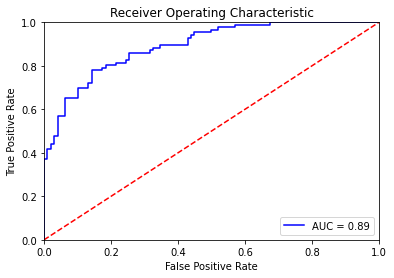

In [ ]:
# membuat plot dengan plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Menurut Metx (1978),Interpretasi nilai Area Under Curve (AUC) di klasifikasikan 5 bagian yang berbeda, yaitu dikatakan tingkat akurasi antara 0.50 - 0.60 (sangat lemah), 0.60 - 0.70 (lemah), 0.70 - 0.80 (sedang), 0.80 - 0.90 (tinggi), dan 0.90 - 1.00 (sangat tinggi).

Pada hasil grafik AUC tersebut diperoleh 0.89 maka, tingkat akurasi menggunakan model naive bayes sangat tinggi.

# Uji Ketepatan Akurasi dengan Confusion Matrix

> confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya. Confusion matrix berbentuk tabel matriks yang menggambarkan kinerja model klasifikasi pada serangkaian data uji yang nilai sebenarnya diketahui.

dikarenakan pada akurasi dari keenam model supervised learning model yang baik menggunakan naive bayes maka diuji ulang menggunakan confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, NB_pred)

array([[84, 14],
       [21, 65]])

didapatkan nilai TP (True Positive) pada matriks 84, untuk nilai Tipe I eror FP (False Positive) 14, nilai Tipe II eror FN (False Negatif) 21, dan nilai TN (True Negative) 65.

untuk membuat visualisasi, import seaborn terlebih dahulu untuk menjalankan heatmap untuk membuat matrixplot.

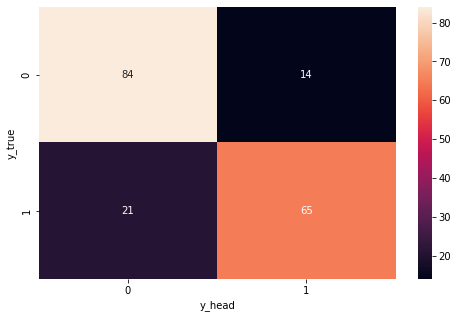

In [ ]:
# Visualisasi matriks
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, NB_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, NB_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        98
           1       0.82      0.76      0.79        86

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184




* Precision menggambarkan tingkat keakuratan antara data yang diminta dengan hasil prediksi yang diberikan oleh model. Maka, precision merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf. Dari semua kelas positif yang telah di prediksi dengan benar, berapa banyak data yang benar-benar positif.

* Recall menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi. Maka, recall merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif.

* Accuracy menggambarkan seberapa akurat model dapat mengklasifikasikan dengan benar. Maka, accuracy merupakan rasio prediksi benar (positif dan negatif) dengan keseluruhan data. Dengan kata lain, accuracy merupakan tingkat kedekatan nilai prediksi dengan nilai aktual (sebenarnya).

* Untuk mengevaluasi kinerja keseluruhan klasifikasi digunakan kesimpulan menggunakan macro.avg dengan persentase sebesar 81% untuk presisi, recall, dan akurasinya.




> Kesimpulan:

berdasarkan tingkat akurasi permodelan naive bayes penderita yang terkena gagal jantung 81% disebabkan mempunyai riwayat serangan jantung sebelumnya.